In [180]:
import numpy as np, pandas as pd, os, json, glob, re, nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import spacy
from spacy import displacy
from textblob.sentiments import NaiveBayesAnalyzer

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from textblob import TextBlob

import scattertext as st
import re, io
from pprint import pprint

from scipy.stats import rankdata, hmean, norm
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("&lt;style>.container { width:98% !important; }&lt;/style>"))

***
Display the data that was cleaned into csv file from the json articles. 
We have considered taking only 
* paperid, 
* title,
* authors,
* bodytext ,
* sections and 
* institutions,because other values such as bibtext, references didn't add much value to the data and also most of the values were null.
***

In [181]:
covid_19 = pd.read_csv("cleanCORD.csv")
covid_19.head()

,Paper_id,Title,Authors,Body_text,Body_Section,institutions
0,0036b28fddf7e93da0970303672934ea2f9944e7,The fecal microbiota and unconjugated fecal bi...,"B Ruggerone, A C Manchester, F Del Baldo, F Fr...",human type 1 DM. The aim of this study was to ...,"Disclosures, Disclosures ESVC-O-2, Disclosure...","University of Thessaly, Texas A&M University, ..."
1,005c43980edf3fcc2a4d12ee7ad630ddb651ce6e,Development of a smartphone-based rapid dual f...,"Seon-Ju Yeo, Homan Kang, Tung Duy Dao, Thi Bui...",Avian influenza (AI) viruses are distinct from...,"Introduction, Introduction Introduction, Intr...","Wonkwang University, Harvard Medical School, W..."
2,00676f1131e03ca8defe523e79bc1635cc933909,Dromedary camels in northern Mali have high se...,"Darryl Falzarano, Badian Kamissoko, Emmie De W...",Dromedary camels (Camelus dromedarius) appear ...,"Introduction, Introduction Introduction, Intr...","Rocky Mountain Laboratories, , Rocky Mountain ..."
3,006be99e337c84b8758591a54f0362353b24dfde,Regulated Export of a Secretory Protein from t...,Stephen S Macintyre,Abstract. The half-time for secretion of the p...,"Animals and Cell Cultures, Animals and Cell C...",Case Western Reserve University at MetroHealth...
4,00a00d0edc750db4a0c299dd1ec0c6871f5a4f24,NaN,NaN,This is an Open Access article distributed und...,"Editorial, Editorial ⓒ 2015 The Korean Societ...",NaN


***
Following visualization was done on body text of all the articles present in csv file. We wanted to check the mosst frequent words the articles have mentioned. This gave us the overview of what we need to expect from these articles, and also what data to look for exactly so that we get more meaningful insights.
***

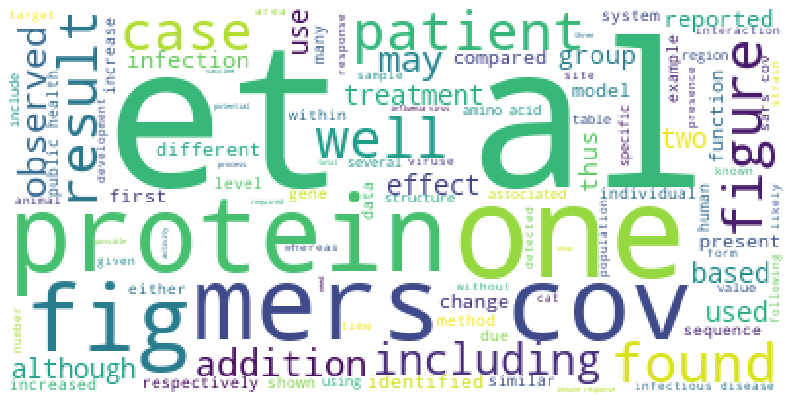

<Figure size 432x288 with 0 Axes>

In [182]:
corpus = []
stopwords = nltk.corpus.stopwords.words('english')

for i in tqdm(range(len(covid_19["Body_text"]))):
    body_text = re.sub('[^a-zA-Z]', ' ', covid_19['Body_text'][i])
    body_text = body_text.lower()
    body_text = body_text.split()
    body_text = [word for word in body_text if not word in set(stopwords)]
    body_text = ' '.join(body_text)
    corpus.append(body_text)

text = ""

for i in tqdm(corpus):
    text += i

wordcloud = WordCloud(max_words=100, background_color="white",contour_color='firebrick').generate(text)

plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation='nearest')
plt.axis("off")
plt.show()
plt.savefig("wc1.png", dpi=900)

***
* From the above word cloud we can identify some of the most prominently used words like patient, protien, treatment, public health individuals,gene sequence, MERS, COV, SARS.
* From these words we can interpret that articles do talk about the treaments and issues faced by public health individuals. Also, they talk about the previous respiratory or influenza diseases that were very much similar to covid19.
* This shows that research is done on current protien and genome sequence based on availability of historical data of MERS and SARS. It also shows the presence of chemical compounds by mentioning about amino acid.
##### * *Further, to dive deeper we are going to find the polarity of the articles talk about what each article focuses on. This will help us identify which paper talk about the cure which comes on positivy polarity and on the other hand which aritcles talk more about the disease and how it has affected the human life based on the negative polarity. We will try to find out the most frequntly used words in each of these articles.*
***

In [183]:
blob = TextBlob(text)
sentiment = blob.sentiment.polarity
print(sentiment)

0.06701958519247303


In [184]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

covid_19['sentiment'] = covid_19['Body_text'].apply(sentiment_calc)

In [185]:
covid_19[['polarity', 'subjectivity']] = pd.DataFrame(covid_19['sentiment'].tolist(), index=covid_19.index) 
covid_19.sort_values(by=['polarity'], inplace=True, ascending=False)
covid_19.sort_values(by=['subjectivity'], inplace=True, ascending=False)

In [186]:
covid  = covid_19[:10]

[Text(0, 0, '7925057cfe0cb75ae6079879cb2d22d23e42dfa5'),
 Text(0, 0, 'f477cb32c61ef1a690f4b9afe74d38f8e147f39f'),
 Text(0, 0, '09cec865941962acf6060e72ef9c477c196c4c3b'),
 Text(0, 0, '2ea88246c467b56b00c2a792dbf3120299a624c7'),
 Text(0, 0, '544a170a18bae9bf44c531c2b0b4bdc5e85ea8f5'),
 Text(0, 0, 'e18773ecee762195cee18f1b3d83ef02f2db0dc9'),
 Text(0, 0, '0346cb9d0f5b07fe50d9a3cc0378a53f1a87708c'),
 Text(0, 0, '2cf45a5a4224dbf38d537eace1f6d49327e3487d'),
 Text(0, 0, '8a6809df45d5f80a822d68d3c305f7640e10234a'),
 Text(0, 0, '58be092086c74c58e9067121a6ba4836468e7ec3')]

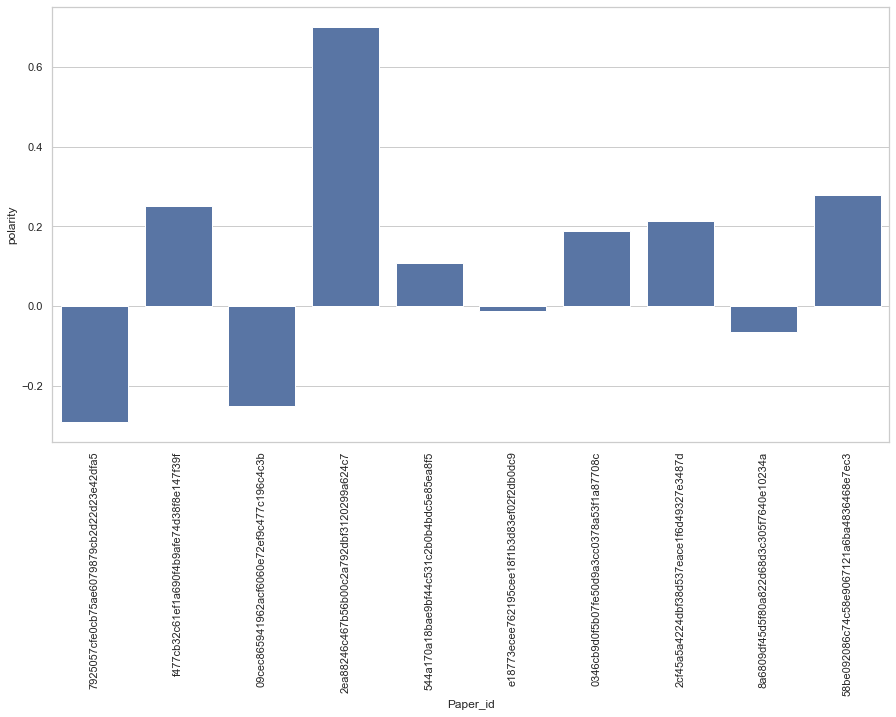

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.barplot(x="Paper_id", y= "polarity", data=covid,
            label="Total", color="b")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)

[Text(0, 0, '7925057cfe0cb75ae6079879cb2d22d23e42dfa5'),
 Text(0, 0, 'f477cb32c61ef1a690f4b9afe74d38f8e147f39f'),
 Text(0, 0, '09cec865941962acf6060e72ef9c477c196c4c3b'),
 Text(0, 0, '2ea88246c467b56b00c2a792dbf3120299a624c7'),
 Text(0, 0, '544a170a18bae9bf44c531c2b0b4bdc5e85ea8f5'),
 Text(0, 0, 'e18773ecee762195cee18f1b3d83ef02f2db0dc9'),
 Text(0, 0, '0346cb9d0f5b07fe50d9a3cc0378a53f1a87708c'),
 Text(0, 0, '2cf45a5a4224dbf38d537eace1f6d49327e3487d'),
 Text(0, 0, '8a6809df45d5f80a822d68d3c305f7640e10234a'),
 Text(0, 0, '58be092086c74c58e9067121a6ba4836468e7ec3')]

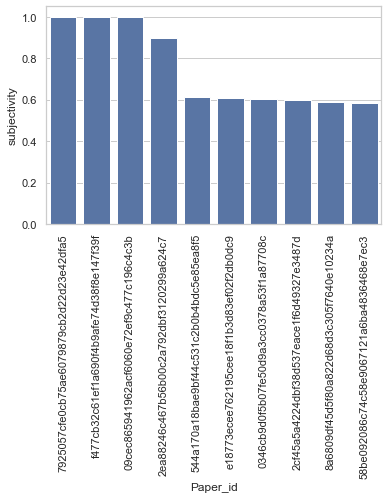

In [188]:
fig1 = sns.barplot(x="Paper_id", y= "subjectivity", data=covid,
            label="Total", color="b")
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=90) 

In [189]:
covid1  = covid_19[:50]

In [190]:
nlp = spacy.load('en_core_web_sm')

In [191]:
covid1['parsed'] = covid1.Body_text.apply(nlp)

In [192]:
print("Document Count")
print(covid1.groupby('Paper_id')['Body_text'].count(), "\t", )
print("Word Count")
covid1.groupby('Paper_id').apply(lambda x: x.Body_text.apply(lambda x: len(x.split())).sum())

Document Count
Paper_id
01297dffaf94c1314ca46088f7b829b8383c2f73    1
0346cb9d0f5b07fe50d9a3cc0378a53f1a87708c    1
09cec865941962acf6060e72ef9c477c196c4c3b    1
0ace222a6c33986dfe57d3f24779fe5f674724c7    1
0f631c3f9ceddcf03d90d552dbc1a7461c3e25db    1
0f8f7f09b42b4b45e128591191176aa358f29b1b    1
20c05a8e1616b61a78300ee5911bc70bd1c952d3    1
2176706829fb93fa471a706137b138e8766b4f32    1
25aad84c22269cf7221d0c22737e2e01a36ec51b    1
2891c813ce4dd156d5f56736db5a10a2065c9167    1
2cf45a5a4224dbf38d537eace1f6d49327e3487d    1
2ea88246c467b56b00c2a792dbf3120299a624c7    1
3424dfd56dfdf957d0fca5e02da73f1352b84ca0    1
3ced31e65e14cbd45628ea410b50d4e4841c9f50    1
3d5f2ea9eca2aa8acb508626fef27e7b1c087312    1
3dd8351aa51cbbf5dbfbd90a569efbad88b57b36    1
3e40cb7055fe5ef148eced8994ff059a0e98aef1    1
3ee36534f2eacdc8e1aee30af62cdc1f6664847a    1
4090c4a0e8cead64dd9e44a1610fb4f557fefdcf    1
41dbdff55ea607010728ddec2392436ef6dfc325    1
464f7d3a460eb51dbc25bd12639b22079a73f85a    1
488e866a3e

Paper_id
01297dffaf94c1314ca46088f7b829b8383c2f73    1037
0346cb9d0f5b07fe50d9a3cc0378a53f1a87708c     535
09cec865941962acf6060e72ef9c477c196c4c3b      66
0ace222a6c33986dfe57d3f24779fe5f674724c7     688
0f631c3f9ceddcf03d90d552dbc1a7461c3e25db    1144
0f8f7f09b42b4b45e128591191176aa358f29b1b    2930
20c05a8e1616b61a78300ee5911bc70bd1c952d3    2636
2176706829fb93fa471a706137b138e8766b4f32     969
25aad84c22269cf7221d0c22737e2e01a36ec51b    6573
2891c813ce4dd156d5f56736db5a10a2065c9167    1481
2cf45a5a4224dbf38d537eace1f6d49327e3487d      91
2ea88246c467b56b00c2a792dbf3120299a624c7      27
3424dfd56dfdf957d0fca5e02da73f1352b84ca0    3925
3ced31e65e14cbd45628ea410b50d4e4841c9f50    2424
3d5f2ea9eca2aa8acb508626fef27e7b1c087312    2570
3dd8351aa51cbbf5dbfbd90a569efbad88b57b36     235
3e40cb7055fe5ef148eced8994ff059a0e98aef1    2664
3ee36534f2eacdc8e1aee30af62cdc1f6664847a    1010
4090c4a0e8cead64dd9e44a1610fb4f557fefdcf    2106
41dbdff55ea607010728ddec2392436ef6dfc325    5748
464f7d3a460

In [193]:
corpus = st.CorpusFromParsedDocuments(covid1, category_col='Paper_id', parsed_col='parsed').build()

In [194]:
html = produce_scattertext_explorer(corpus,
                                    category='3e40cb7055fe5ef148eced8994ff059a0e98aef1',
                                    category_name='',
                                    not_category_name='',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.scale,
                                    metadata=covid1['Paper_id'])
file_name = 'Covid2.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

In [195]:
html = st.produce_scattertext_explorer(corpus,
                                       category='3e40cb7055fe5ef148eced8994ff059a0e98aef1',
#                                        category_name='Democratic',
#                                        not_category_name='Republican',
                                       minimum_term_frequency=5,
                                       width_in_pixels=1000,
                                       transform=st.Scalers.log_scale_standardize)
file_name = 'LogCovid.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

In [196]:
corpus = st.CorpusFromPandas(covid, category_col='Paper_id', text_col='Body_text',nlp=nlp).build()

In [197]:
print(list(corpus.get_scaled_f_scores_vs_background().index[:20]))

['evolstar', 'ebhga', 'nhip', 'complicaciones', 'centor', 'exudado', 'criterios', 'causada', 'frecuente', 'nhips', 'penicilina', 'aguda', 'nimblescan', 'amigdalar', 'supurativas', 'bacteriana', 'resequencing', 'respiratoria', 'amoxicilina', 'reassortments']


In [198]:
feat_builder = st.FeatsFromOnlyEmpath()

In [199]:
empath_corpus = st.CorpusFromParsedDocuments(covid1,category_col='Paper_id',feats_from_spacy_doc=feat_builder,parsed_col='Body_text').build()

In [204]:
html = st.produce_scattertext_explorer(empath_corpus,category='8a6809df45d5f80a822d68d3c305f7640e10234a',
                                       category_name='e18773ecee762195cee18f1b3d83ef02f2db0dc9',
                                       not_category_name='e18773ecee762195cee18f1b3d83ef02f2db0dc9',
                                       width_in_pixels=1000,metadata=covid['Body_text'],use_non_text_features=True,
                                       use_full_doc=True,topic_model_term_lists=feat_builder.get_top_model_term_lists())
open("Convention-Visualization-Empath.html", 'wb').write(html.encode('utf-8'))
IFrame(src="Convention-Visualization-Empath.html", width = 1200, height=700)

AssertionError: 

In [205]:
html = st.produce_scattertext_explorer(empath_corpus,category='3e40cb7055fe5ef148eced8994ff059a0e98aef1',
                                       category_name='3e40cb7055fe5ef148eced8994ff059a0e98aef1',
                                       not_category_name='3e40cb7055fe5ef148eced8994ff059a0e98aef1',
                                       width_in_pixels=1000,metadata=covid1['Body_text'],use_non_text_features=True,
                                       use_full_doc=True,topic_model_term_lists=feat_builder.get_top_model_term_lists())
open("Convention-Visualization-Empath.html", 'wb').write(html.encode('utf-8'))
IFrame(src="Convention-Visualization-Empath.html", width = 1200, height=700)

In [81]:
import string

def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [85]:
covid_19['tokenized'] = covid_19['Body_text'].map(lambda x: clean_text(x))

In [83]:
covid_19['num_wds'] = covid_19['tokenized'].apply(lambda x: len(x.split()))
covid_19['num_wds'].mean()

4051.6962557846023

In [106]:
def find_cc_wds(content, cc_wds=['covid19','vaccine', 'quarantine', 'corona virus'
                                 'pandemic', 'social distancing','SARS','MERS','genome','China','Wuhan','economy']
):
    found = False
    for w in cc_wds:
        if w in content:
            found = True
            break

    if not found:
        disj = re.compile(r'(vaccine\w+\W+(?:\w+\W+){1,5}?developed) | (coronavirus\W+(?:\w+\W+){1,5}?deaths)')
        if disj.match(content):
            found = True
    return found

In [122]:
covid_19['cc_wds'] = covid_19['tokenized'].apply(find_cc_wds)
valid_papers = covid_19[covid_19['cc_wds']==True]

In [147]:
valid_papers.reset_index(inplace = True, drop = True) 
valid_papers.head()

,Paper_id,Title,Authors,Body_text,Body_Section,institutions,sentiment,polarity,subjectivity,tokenized,num_wds,cc_wds
0,544a170a18bae9bf44c531c2b0b4bdc5e85ea8f5,Conflicts of interest,"K L Hon, Karen Ky Leung",To the Editor-In a statement to the media on 3...,Severe acute respiratory symptoms and suspect...,"The Hong Kong Children's Hospital, The Hong Ko...","(0.10813692480359147, 0.614983164983165)",0.108137,0.614983,to the editorin a statement to the media on 3 ...,415,True
1,8a6809df45d5f80a822d68d3c305f7640e10234a,Large-scale evolutionary surveillance of the 2...,"Charlie Wah, Heng Lee, Chee Wee Koh, Yang Sun ...","groups, there remains the possibility that fut...","BACKGROUND, BACKGROUND BACKGROUND, BACKGROUND...","Genome Institute of Singapore, Genome Institut...","(-0.06565733869305286, 0.5884585807567178)",-0.065657,0.588459,groups there remains the possibility that futu...,6156,True
2,58be092086c74c58e9067121a6ba4836468e7ec3,NaN,NaN,"administration reduces viral load. Also, the a...",Opinions on the Effectiveness of COVID-19 Ant...,NaN,"(0.279, 0.5850000000000001)",0.279000,0.585000,administration reduces viral load also the aut...,544,True
3,3424dfd56dfdf957d0fca5e02da73f1352b84ca0,The role of C5a in acute lung injury induced b...,"Renxi Wang, Renfeng Guo, Yan Li, Beifen Shen",The epithelium of the lung is vulnerable to da...,"INTRODUCTION, INTRODUCTION ACUTE LUNG INJURY ...",", , ,","(0.13669210555741926, 0.5614111595661407)",0.136692,0.561411,the epithelium of the lung is vulnerable to da...,3923,True
4,7a920d6b53c292f53323cb6c5109732a9575e33c,Electronic) A periodical of the Network for th...,"Khalid Hajissa, Robaiza Zakaria, Rapeah Suppia...",Toxoplasmosis is a prevalent disease caused by...,"Introduction, Introduction Introduction, Intr...","Universiti Sains Malaysia, Universiti Sains Ma...","(0.14173685935515595, 0.5583112786267364)",0.141737,0.558311,toxoplasmosis is a prevalent disease caused by...,2995,True


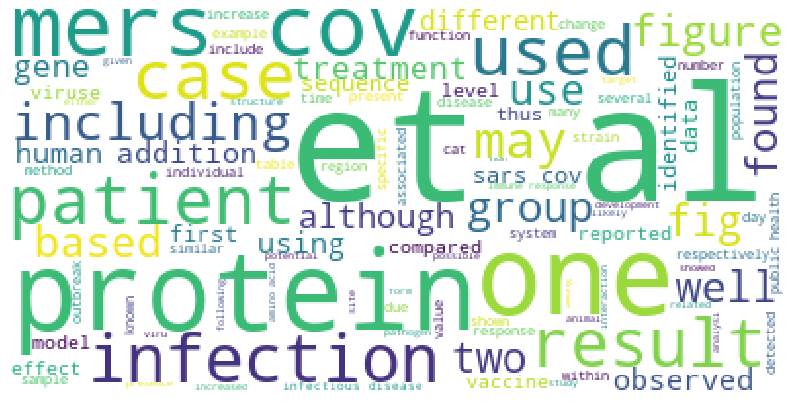

<Figure size 432x288 with 0 Axes>

In [148]:
corpus = []
stopwords = nltk.corpus.stopwords.words('english')

for i in tqdm(range(len(valid_papers["Body_text"]))):
    body_text = re.sub('[^a-zA-Z]', ' ', valid_papers['Body_text'][i])
    body_text = body_text.lower()
    body_text = body_text.split()
    body_text = [word for word in body_text if not word in set(stopwords)]
    body_text = ' '.join(body_text)
    corpus.append(body_text)

text = ""

for i in tqdm(corpus):
    text += i

wordcloud = WordCloud(max_words=100, background_color="white",contour_color='firebrick').generate(text)

plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation='nearest')
plt.axis("off")
plt.show()
plt.savefig("wc1.png", dpi=900)

In [149]:
blob = TextBlob(text)
sentiment = blob.sentiment.polarity
print(sentiment)

0.07130380176949427
